# Housing

This script is, at least for the first part, the script that [Andrei Lyskov](https://twitter.com/LyskovAndrei) showed us during is talk [Getting Started with Data Science using Python](https://www.meetup.com/fr-FR/msdevmtl/events/243333977/) in Montréal, Qc on Wednesday, April 18th, 2018.

I can't say that I understand everything but I think the example he used is a very interesting one to start.

## Dataset

### California Housing

This dataset came from [Aurélien Geron GitHub repository](https://github.com/ageron/handson-ml/tree/master/datasets/housing). 

> This dataset is a modified version of the California Housing dataset available from [Luís Torgo's page](http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html) (University of Porto). Luís Torgo obtained it from the StatLib repository (which is closed now). The dataset may also be downloaded from StatLib mirrors.

> This dataset appeared in a 1997 paper titled *Sparse Spatial Autoregressions* by Pace, R. Kelley and Ronald Barry, published in the *Statistics and Probability Letters* journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

> The dataset in this directory is almost identical to the original, with two differences:

> * 207 values were randomly removed from the `total_bedrooms` column, so we can discuss what to do with missing data.
> * An additional categorical attribute called `ocean_proximity` was added, indicating (very roughly) whether each block group is near the ocean, near the Bay area, inland or on an island. This allows discussing what to do with categorical data.

## Loading data

We use [pandas](https://pandas.pydata.org/) to load the dataset. 

> pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

### Show me the data

In addition to helping loading data, pandas come with a lot of functions to display and manipulate data. Two interestings one are : `head` and `describe`.

* [head](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html): return data for the first X rows. The default value is 5.
* [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html): generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [69]:
import pandas as pd
housing = pd.read_csv('../datasets/housing/housing.csv')
print(housing.head())
print(housing.describe())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
          longitude      latitude  housing_median_age   total_rooms  \
coun

## A picture is worth a thousand words

It is tough to find meaning in data when they are incorrect from the beginning.  So a first important step is the _see_ your data. To be sure that they make sense and, if not, to be able to take action to correct them.

First of all, you need to load the [matplotlib library](https://matplotlib.org/) to be able to draw some graphs.

> Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter notebook, web application servers, and four graphical user interface toolkits.

To load it in the jupyter environment, type `%matplotlib inline`

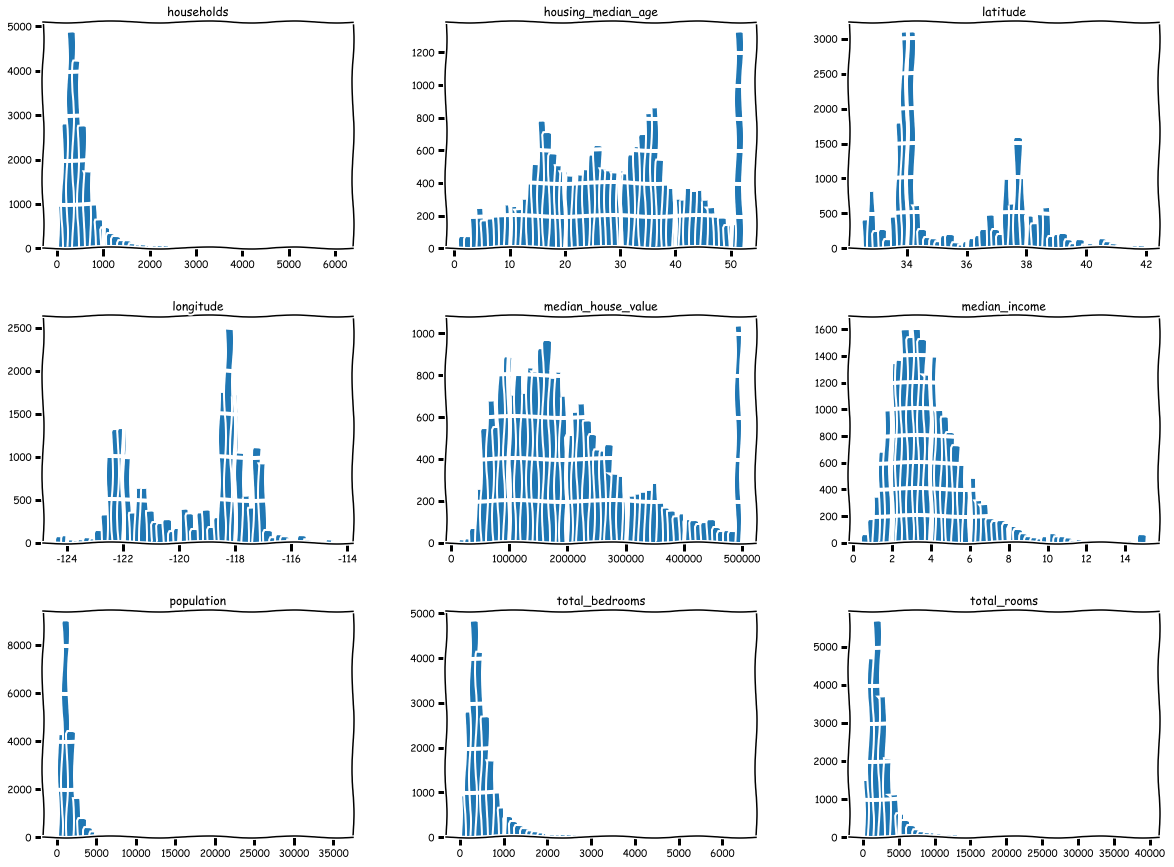

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

At the first glance, we can see some weird 'full bar' at the rightmost of the **housing median age** and **median_house_value** charts. This situation could come from many different reasons but, in our case, it's most likely because data was 'caps' at certain levels. Any house older than 50 years is set to 50 years. And it's the same for house value, any house that worth more than 500k was recorded with a 500k price tag. 

We can confirm that with this command:

In [71]:
housing[['housing_median_age', 'median_house_value']].describe()

,housing_median_age,median_house_value
count,20640.000000,20640.000000
mean,28.639486,206855.816909
std,12.585558,115395.615874
min,1.000000,14999.000000
25%,18.000000,119600.000000
50%,29.000000,179700.000000
75%,37.000000,264725.000000
max,52.000000,500001.000000


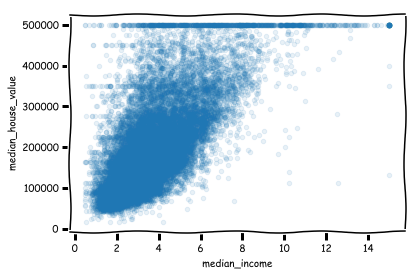

In [72]:
housing.plot(kind='scatter', x='median_income', y= 'median_house_value', alpha=0.1)

In [73]:
corr_matrix = housing.corr()

median_total_bedrooms = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)


print(corr_matrix['median_house_value'].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

housing = housing[housing['median_house_value'] < 500000]

dummies = pd.get_dummies(housing['ocean_proximity'])
housing = housing.drop('ocean_proximity', axis=1)
housing = pd.concat([housing, dummies], axis=1)

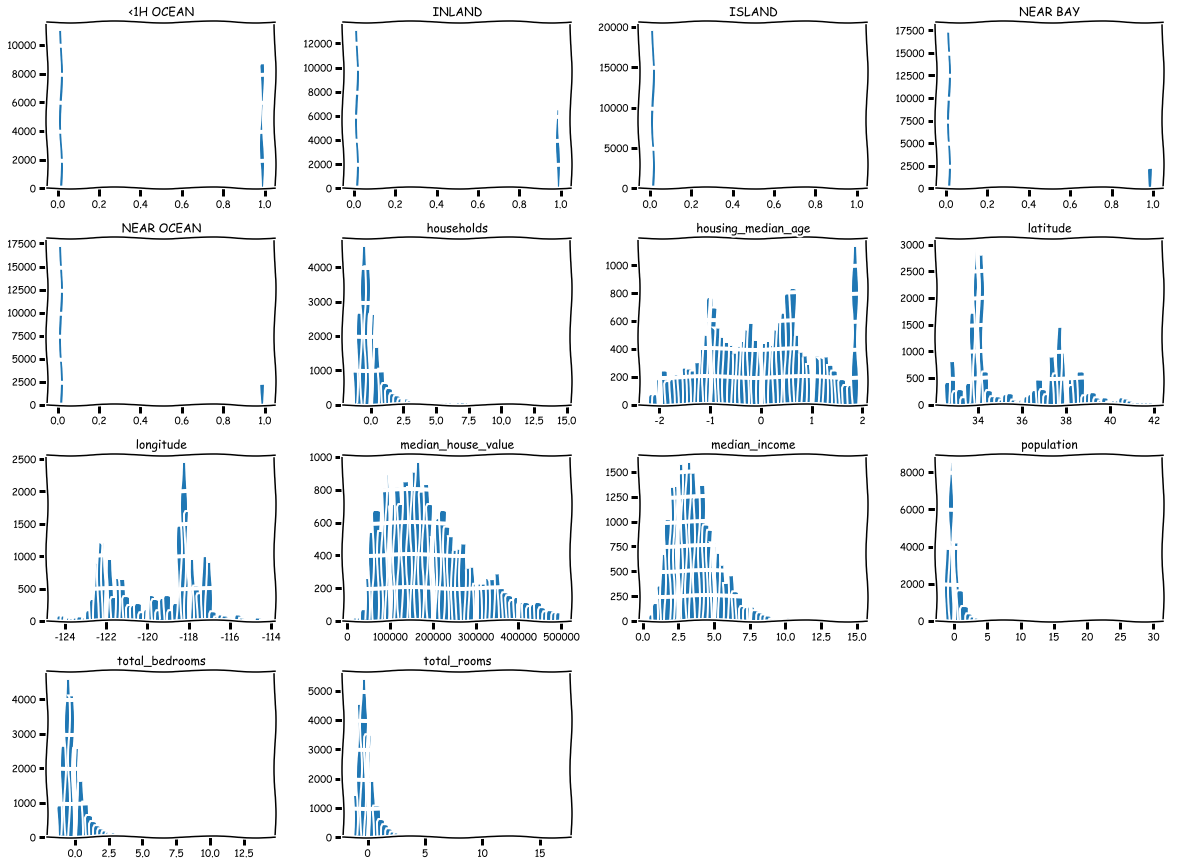

In [75]:
cols =  ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population' , 'households']

scaler= StandardScaler()

housing[cols] = scaler.fit_transform(housing[cols])

housing.hist(bins=50, figsize=(20,15))
plt.show()

## Because everyone loves XKCD!

Data Science is not required to be always serious! In fact, it's more entertaining when it's fun too! And no one is better to draw interesting graphs than Randall Munroe, the creator of XKCD. That was true until some people take the time to build an extension for matplotlib that allow us to draw graphs on the XKCD style!

And, on top, it's ridiculously easy to do!  Just call the `xkcd` method of matplotlib after initializing it.

**Et voilà !**

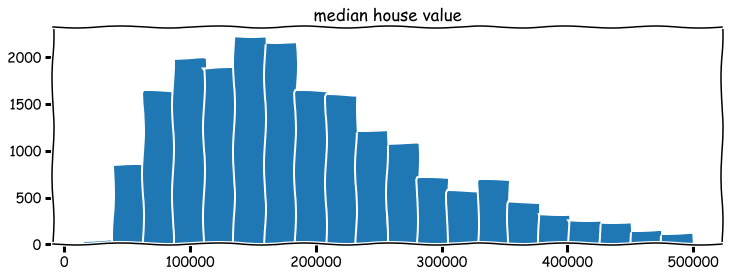

In [76]:
plt.xkcd()
housing['median_house_value'].hist(bins=20, figsize=(12,4), grid=0) # XKCD graphics are more beautiful without grid
plt.title('median house value')
plt.show()